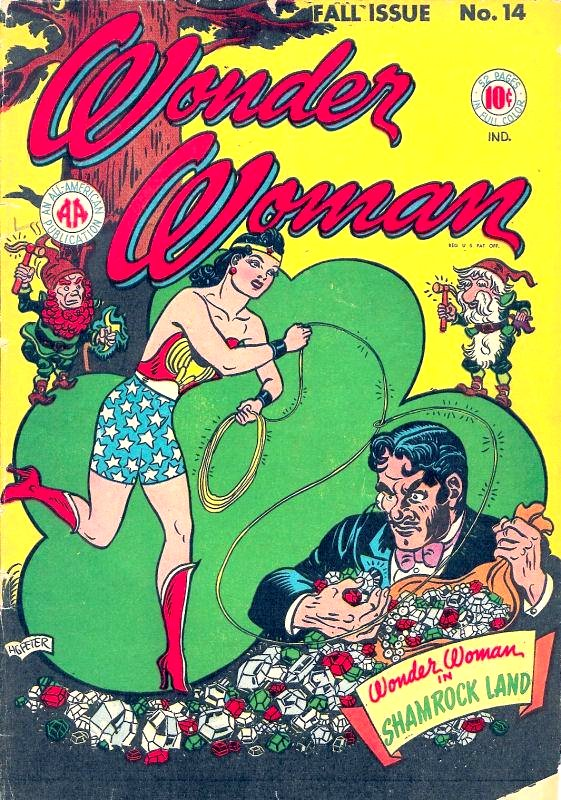
\begin{align}\textrm{The lasso of truth}\end{align}

# The Prosecutor's Fallacy

Imagine you have been arrested for murder. You know that you are innocent, but physical evidence at the scene of the crime matches your description. The prosecutor argues that you are guilty because the odds of finding this evidence given that you are innocent are so small that the jury should discard the probability that you did not actually commit the crime. 

But those numbers don't add up. The prosecutor has misapplied *conditional probability* and neglected the prior odds of you, the defendant, being guilty before they introduced the evidence. 

## Conditional Probability

The [prosecutor's fallacy](https://www.cebm.net/2018/07/the-prosecutors-fallacy/) is a courtroom misapplication of [Bayes' Theorem](https://www.youtube.com/watch?v=LIQrs3dviIs). Rather than ask the probability that the defendant is $\color{blue}{\text{innocent}}$ given all the $\color{green}{\text{evidence}}$, the prosecution, judge, and jury make the mistake of asking what the probability is that the $\color{green}{\text{evidence}}$ would occur if the defendant were $\color{blue}{\text{innocent}}$ (a much smaller number):

+ **What we want to know in the name of justice:**

$P(\textrm{defendant is guilty}|\textrm{all the evidence})$

+ **What the prosecutor is usually actually demonstrating to the court:**

$P(\textrm{all the evidence}|\textrm{defendant is innocent})$

### Bayes Theorem

To illustrate why this difference can spell life or death, imagine yourself the defendant again. You want to prove to the court that you're really telling the truth, so you agree to a polygraph test.

Coincidentally, the same man who invented the lie detector later created _Wonder Woman_ and her lasso of truth.

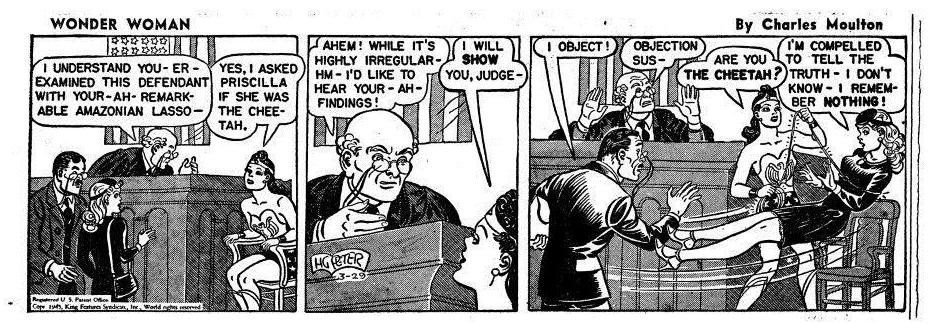
\begin{align}Coincidence?\end{align}

William Moulton Marston debuted his invention in the case of [James Alphonso Frye](https://www.yalelawjournal.org/essay/on-evidence-proving-frye-as-a-matter-of-law-science-and-history), who was accused of murder in 1922.

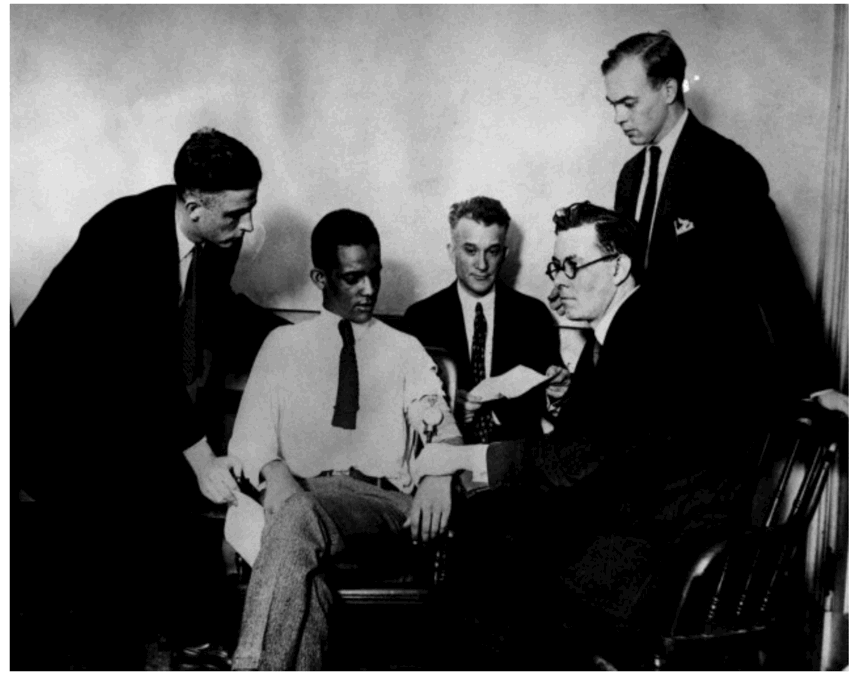
\begin{align}\textit{Frye being polygraphed by Marston}\end{align}
 
For our simulation, we'll take the mean of a more modern polygraph from [this paper](https://www.tandfonline.com/doi/full/10.1080/23744006.2015.1060080) ("Accuracy estimates of the CQT range from 74% to 89% for guilty examinees, with 1% to 13% false-negatives, and 59% to 83% for innocent examinees, with a false-positive ratio varying from 10% to 23%...")

\begin{array}{rr} \hline
              &Lying (0.15)  &Not Lying (0.85)  \\ \hline
Test (+) &0.81 &0.17  \\ \hline
Test (-) &0.08 &0.71  \\ \hline
\end{array}

Examine these percentages a moment. Given that [this study](http://wwwp.oakland.edu/Assets/upload/docs/News/2014/Serota-Levine-Prolific-Liars-2014.pdf) found that a vast majority of people are honest most of the time, and that "big lies" are things like "not telling your partner who you have really been with", let's generously assume that 15% of people would lie about murder under a polygraph test, and 85% would tell the truth.

If we tested 10,000 people with this lie detector under these assumptions... 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('cubehelix')

1500 people out of 10000 are_lying 

1215 people out of 10000 are_true_positives 

120 people out of 10000 are_false_negatives 

8500 people out of 10000 are_not_lying 

1445 people out of 10000 are_false_positives 

6035 people out of 10000 are_true_negatives 



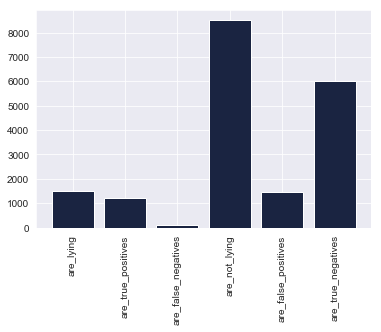

In [70]:
def calc_liars_non_liars(pct_liars, pct_non_liars):

    are_lying = 10000*pct_liars
    are_true_positives = are_lying*0.81
    are_false_negatives = are_lying*0.08
    
    are_not_lying = 10000*pct_non_liars
    are_false_positives = are_not_lying*0.17
    are_true_negatives = are_not_lying*0.71
    
    dictionary = {'are_lying':are_lying, 'are_true_positives':are_true_positives, 'are_false_negatives':are_false_negatives, 
            'are_not_lying':are_not_lying, 'are_false_positives':are_false_positives, 'are_true_negatives':are_true_negatives}
    
    for item in dictionary.items():
        print(f"{int(item[1])} people out of 10000 {item[0]} \n")
        
    names = list(dictionary.keys())
    values = list(dictionary.values())
    
    plt.bar(range(len(dictionary)),values,tick_label=names)
    plt.xticks(rotation='vertical')
    plt.savefig("plot.png")
    plt.show()
        
calc_liars_non_liars(0.15, 0.85)

The important distinctions to know before we apply Bayes' Theorem are these:

+ The _true positives_ are the people who lied and failed the polygraph (they were screened correctly)
+ The _false negatives_ are the people who lied and *beat* the polygraph (they were screened incorrectly)
+ The _false positives_ are the people who told the truth but failed the polygraph anyway
+ The _true negatives_ are the people who told the truth and passed the polygraph

Got it? Good.

#### Now: If you, defendant, got a $\color{green}{\text{positive}}$ lie detector test, what is the chance you were _actually_ $\color{magenta}{\text{lying}}$?

What the polygraph examiner really wants to know is not $P(+|L)$, which is the accuracy of the test; but rather $P(L|+)$, or the probability you were lying given that the test was positive. We know how $P(+|L)$ relates to $P(L|+)$.

\begin{align} &P(L|+) &= \frac{P(+|L)P(L)}{P(+)} \end{align}

To figure out what $P(+)$ is _a posteriori_ (independent of our prior knowledge of whether or not someone was lying), we need to compute the total sample space of the event of testing positive using the [Law of Total Probability](https://www.statisticshowto.datasciencecentral.com/total-probability-rule/):

\begin{align}&P(L|+) &= \frac{P(+|L)P(L)}{P(+|L)P(L) + P(+|L^c)P(L^c)} \end{align}

That is to say, we need to know not only the probability of testing positive given that you _are_ lying, but also the probability of testing positive given that you're _not_ lying (our false positive rate). The sum of those two terms gives us the total probability of testing positive. That allows us to finally determine the conditional probability that you are lying: 

In [68]:
 def P_L_pos(pct_liars, pct_non_liars):
    P_pos_L = 0.81
    P_L = pct_liars
    P_pos_not_L = 0.17
    P_not_L = pct_non_liars
    
    P_pos = (P_pos_L*P_L)+(P_pos_not_L*P_not_L)
    
    P_L_pos = (P_pos_L*P_L)/(P_pos)
    
    print(f'The probability that you are actually lying, given that you tested positive on the polygraph, is {round(P_L_pos*100, 2)}%.')

In [69]:
P_L_pos(0.15, 0.85)

The probability that you are actually lying, given that you tested positive on the polygraph, is 45.68%.


In [73]:
def false_pos(pct_liars, pct_non_liars):
    P_pos_L = 0.81
    P_L = pct_liars
    P_pos_not_L = 0.17
    P_not_L = pct_non_liars
    
    P_pos = (P_pos_L*P_L)+(P_pos_not_L*P_not_L)
    
    P_not_L_pos = (P_pos_not_L*P_not_L)/P_pos
    
    print(f'The probability of a false positive is {round(P_not_L_pos*100, 2)}%.')

In [74]:
false_pos(0.15, 0.85)

The probability of a false positive is 54.32%.


The probability that you're actually lying, given a positive test result, is only **45.68%**. That's _worse than chance_. Note how it differs from the test's _accuracy_ levels (81% true positives and 71% true negatives). Meanwhile, your risk of being falsely accused of lying, even if you're telling the truth, is also close to–indeed, slightly higher than–chance, at **54.32%**. Not reassuring.

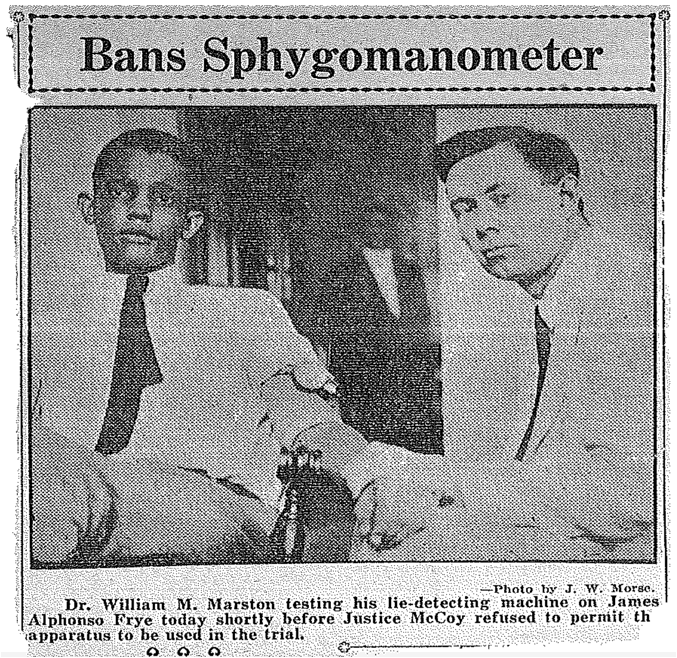
\begin{align}\textrm{Marston was, in fact, a notorious fraud.}\end{align}

The _Frye_ court ruled that the polygraph test could not be trusted as evidence. To this day, lie detector tests are inadmissible in court because of their unreliability. But that does not stop the prosecutor's fallacy from creeping in to court in other, more insidious ways.

# "Suspicious" Deaths

Unfortunately, this statistical reasoning error runs rampant in the criminal justice system and corrupts criminal cases that rely on everything from fingerprints to DNA evidence to cell tower data. What's worse, courts often reject the expert testimony of statisticians because "it's not rocket science"–it's "common sense":

+ In the Netherlands, a nurse named [Lucia de Berk](https://arxiv.org/pdf/math/0607340.pdf) went to prison for life because she had been proximate to "suspicious" deaths that a statistical expert calculated had less than a 1 in 342 million chance of being random. The calculation, tainted by the prosecutor's fallacy, was incorrect. The true figure was more like 1 in 50 (or even 1 in 5). What's more, many of the "incidents" were only marked suspicious _after_ investigators knew that she had been close by.

+ A British nurse, [Ben Geen](https://www.thetimes.co.uk/article/nurse-was-victim-of-shipman-hysteria-3q9c6nrmxjp), was accused of inducing respiratory arrest for the "thrill" of reviving his patients, on the claim that respiratory arrest was too rare a phenomenon to occur by chance given that Green was near. 

+ Mothers in the U.K. have been prosecuted for murdering their children, when really they died of SIDS, after experts erroneously quoted the odds of two children in the same family dying of SIDS as 1 in [73 million](https://www.theguardian.com/science/2006/oct/28/uknews1)

The data in Ben Geen's case are available thanks to Freedom of Information requests -- so I have briefly analyzed them. 

In [3]:
# Hospital data file from the expert in Ben Geen's exoneration case
# Data acquired through FOI requests
# Admissions: no. patients admitted to ED by month
# CardioED: no. patients admitted to CC from ED by month with cardio-respiratory arrest
# RespED: no. patients admitted to CC from ED by month with respiratory arrest 

import pandas as pd
hdf = pd.read_csv('Hdf.csv')
hdf.head()

,Year,Month,CardioTot,CardioED,HypoTot,HypoED,RespTot,RespED,Admissions,AllCases,MonthNr,Hospital
0,1999,Nov,4.0,3.0,0.0,0.0,0.0,0.0,1189.0,4.0,-1,Oxford Radcliffe
1,1999,Dec,8.0,5.0,0.0,0.0,0.0,0.0,1378.0,8.0,0,Oxford Radcliffe
2,2000,Jan,7.0,2.0,0.0,0.0,1.0,1.0,1185.0,8.0,1,Oxford Radcliffe
3,2000,Feb,5.0,3.0,0.0,0.0,1.0,0.0,1139.0,6.0,2,Oxford Radcliffe
4,2000,Mar,7.0,2.0,0.0,0.0,0.0,0.0,1215.0,7.0,3,Oxford Radcliffe


The most comparable hospitals to the one in which Geen worked are large hospitals that saw at least one case of respiratory arrest (although "0" in the data most likely means "missing data" and not that zero incidents occurred).

In [4]:
hdf['RespED'].isna().count()

3212

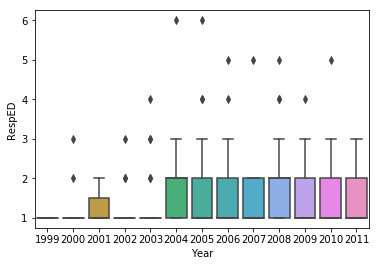

In [96]:
import seaborn as sns
df = hdf[(hdf['RespED']>0) & (hdf['CardioED']>0)]
ax = sns.boxplot(x='Year', y='RespED', data=df)

#hdf.plot.line(subplots=True, x='Year', y=['Admissions', 'CardioED', 'RespED'], layout=(3,1), figsize=(13,13))

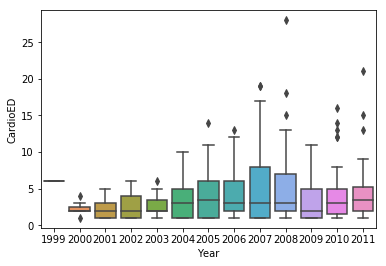

In [97]:
ax = sns.boxplot(x='Year', y='CardioED', data=df)

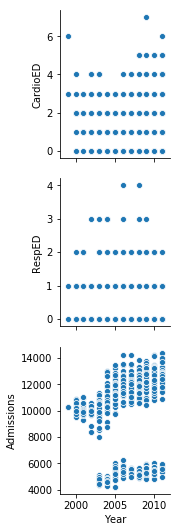

In [89]:
ax = sns.pairplot(df, x_vars=['Year'], y_vars=['CardioED', 'RespED', 'Admissions'])

In [101]:
hdf['RespED'].describe()

count    2235.000000
mean        0.301566
std         0.701305
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: RespED, dtype: float64

In [84]:
hdf['CardioED'].describe()

count    2235.000000
mean        1.511409
std         2.556125
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        28.000000
Name: CardioED, dtype: float64

In [85]:
df['Hospital'].unique()

array(['Doncaster & B', 'Nottingham', 'Frenchay', 'Leicester'],
      dtype=object)

In [70]:
df['CardioED'].describe()

count    85.000000
mean      2.082353
std       1.187352
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: CardioED, dtype: float64

The four hospitals that are comparable to the one where Geen worked are Hexham, Solihull, Wansbeck, and Wycombe. The data for Solihull (for both CardioED and RespED) are anomalous:

In [106]:
import re
regex = re.compile(r'(Hexham|Solihull|Wansbeck|Wycombe)')
compdf = hdf[hdf['Hospital'].str.match(regex) == True]

In [131]:
compdf.pivot_table(index='Hospital').reset_index()

,Hospital,Admissions,AllCases,CardioED,CardioTot,HypoED,HypoTot,MonthNr,RespED,RespTot,Year
0,Hexham,382.520408,2.724490,0.887755,0.887755,1.673469,1.673469,71.5,0.163265,0.163265,2005.410959
1,Solihull,557.306818,0.301587,0.000000,0.261905,0.000000,0.039683,71.5,0.000000,0.000000,2005.410959
2,Wansbeck,1706.285714,16.969388,5.010204,5.010204,10.918367,10.918367,71.5,1.040816,1.040816,2005.410959
3,Wycombe,NaN,0.980392,0.568627,0.627451,0.039216,0.058824,71.5,0.235294,0.294118,2005.410959


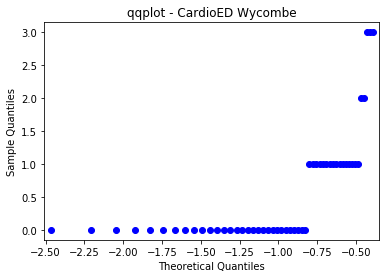

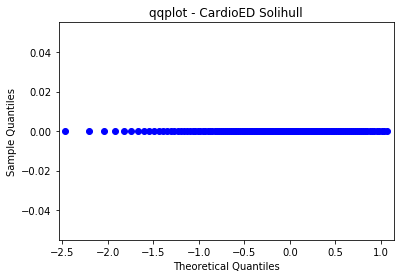

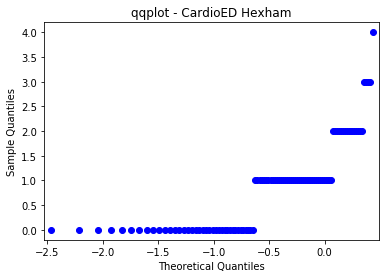

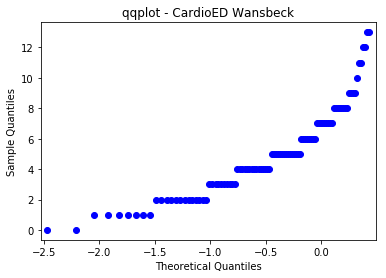

In [153]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

for hospital in compdf['Hospital'].unique():
    data = compdf[(compdf['Hospital'] == hospital)].CardioED.values.flatten()
    
    fig = sm.qqplot(data, line='s')
    h = plt.title(f'qqplot - CardioED {hospital}')
    plt.show()

In [154]:
regex = re.compile(r'(Hexham|Wansbeck|Wycombe)')
compdf = hdf[hdf['Hospital'].str.match(regex) == True]

After accounting for the discrepancies in the data, we can calculate that respiratory events without accompanying cardiac events happen, on average, roughly a little under 5 times as often as cardiac events (4.669 CardioED admissions on average per RespED admission).

In [171]:
mean_cardio = compdf['CardioED'].mean()
mean_resp = compdf['RespED'].mean()
mean_cardio/mean_resp

4.6692307692307695

In [185]:
compdf.dropna(inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CardioTot  CardioED  HypoTot  HypoED  RespTot  RespED  Admissions  \
Year Month                                                                      
2003 Apr          3.5       3.5      2.0     2.0      0.0     0.0       739.0   
     Aug          1.5       1.5      2.0     2.0      0.5     0.5       792.5   
     Dec          3.0       3.0      5.0     5.0      1.5     1.5       865.5   
     Jul          1.0       1.0      4.5     4.5      0.5     0.5       843.5   
     Jun          2.0       2.0      5.5     5.5      0.5     0.5       819.0   
     May          1.5       1.5      2.5     2.5      0.0     0.0       793.0   
     Nov          1.5       1.5      3.0     3.0      0.5     0.5       771.5   
     Oct          1.0       1.0      2.5     2.5      0.0     0.0       813.5   
     Sep          1.0       1.0      1.0     1.0      0.0     0.0       782.0   
2004 Apr          4.0       4.0      4.0     4.0      1.5     1.5       828.5   
     Aug          3.0       3.0      3.5     3.5      2.5     2.5       837.5   
     Dec          3.0       3.0      3.5     3.5      0.0     0.0       972.0   
     Feb          1.5       1.5      3.5     3.5      0.0     0.0       757.0   
     Jan          1.0       1.0      3.5     3.5      0.0     0.0       846.0   
     Jul          2.0       2.0      4.0     4.0      1.0     1.0       864.0   
     Jun          4.0       4.0      4.0     4.0      1.0     1.0       885.5   
     Mar          4.0       4.0      3.5     3.5      0.0     0.0       855.5   
     May          2.0       2.0      5.0     5.0      0.5     0.5       863.0   
     Nov          3.5       3.5      2.5     2.5      0.0     0.0       823.5   
     Oct          5.0       5.0      0.5     0.5      0.5     0.5       871.0   
     Sep          2.0       2.0      3.5     3.5      0.5     0.5       853.5   
2005 Apr          5.5       5.5      8.0     8.0      1.0     1.0      1015.5   
     Aug          4.0       4.0      5.5     5.5      0.5     0.5      1109.0   
     Dec          3.0       3.0     10.0    10.0      1.0     1.0      1080.5   
     Feb          1.0       1.0      3.5     3.5      0.0     0.0       893.0   
     Jan          2.5       2.5      3.5     3.5      0.0     0.0       972.5   
     Jul          3.5       3.5      5.0     5.0      0.0     0.0      1115.5   
     Jun          1.5       1.5      9.0     9.0      2.0     2.0      1133.0   
     Mar          2.0       2.0      3.0     3.0      0.5     0.5       990.0   
     May          2.0       2.0      7.0     7.0      0.0     0.0      1039.5   
...               ...       ...      ...     ...      ...     ...         ...   
2008 Sep          3.5       3.5      2.5     2.5      1.0     1.0      1107.0   
2009 Apr          1.5       1.5      7.5     7.5      1.0     1.0      1143.0   
     Aug          0.5       0.5     10.5    10.5      0.0     0.0      1083.5   
     Dec          5.0       5.0      6.5     6.5      0.5     0.5      1150.0   
     Feb          2.0       2.0      8.5     8.5      1.0     1.0      1087.0   
     Jan          4.5       4.5      7.0     7.0      2.0     2.0      1103.0   
     Jul          1.5       1.5     10.5    10.5      0.5     0.5      1153.0   
     Jun          3.5       3.5      8.0     8.0      0.5     0.5      1108.5   
     Mar          1.5       1.5     13.0    13.0      0.5     0.5      1175.5   
     May          2.5       2.5      6.0     6.0      2.0     2.0      1120.0   
     Nov          3.5       3.5      6.0     6.0      0.0     0.0      1067.5   
     Oct          6.0       6.0      8.0     8.0      1.5     1.5      1189.5   
     Sep          3.5       3.5      8.5     8.5      0.0     0.0      1177.5   
2010 Apr          5.5       5.5      9.0     9.0      1.0     1.0      1158.5   
     Aug          2.0       2.0      9.5     9.5      0.0     0.0      1212.0   
     Dec          3.5       3.5      6.5     6.5      0.5     0.5      1251.5   
     Feb          2.5       2.5      8.5   

In [186]:
compdf.groupby(['Year','Month']).mean()

CardioTot  CardioED  HypoTot  HypoED  RespTot  RespED  Admissions  \
Year Month                                                                      
2003 Apr          3.5       3.5      2.0     2.0      0.0     0.0       739.0   
     Aug          1.5       1.5      2.0     2.0      0.5     0.5       792.5   
     Dec          3.0       3.0      5.0     5.0      1.5     1.5       865.5   
     Jul          1.0       1.0      4.5     4.5      0.5     0.5       843.5   
     Jun          2.0       2.0      5.5     5.5      0.5     0.5       819.0   
     May          1.5       1.5      2.5     2.5      0.0     0.0       793.0   
     Nov          1.5       1.5      3.0     3.0      0.5     0.5       771.5   
     Oct          1.0       1.0      2.5     2.5      0.0     0.0       813.5   
     Sep          1.0       1.0      1.0     1.0      0.0     0.0       782.0   
2004 Apr          4.0       4.0      4.0     4.0      1.5     1.5       828.5   
     Aug          3.0       3.0      3.5     3.5      2.5     2.5       837.5   
     Dec          3.0       3.0      3.5     3.5      0.0     0.0       972.0   
     Feb          1.5       1.5      3.5     3.5      0.0     0.0       757.0   
     Jan          1.0       1.0      3.5     3.5      0.0     0.0       846.0   
     Jul          2.0       2.0      4.0     4.0      1.0     1.0       864.0   
     Jun          4.0       4.0      4.0     4.0      1.0     1.0       885.5   
     Mar          4.0       4.0      3.5     3.5      0.0     0.0       855.5   
     May          2.0       2.0      5.0     5.0      0.5     0.5       863.0   
     Nov          3.5       3.5      2.5     2.5      0.0     0.0       823.5   
     Oct          5.0       5.0      0.5     0.5      0.5     0.5       871.0   
     Sep          2.0       2.0      3.5     3.5      0.5     0.5       853.5   
2005 Apr          5.5       5.5      8.0     8.0      1.0     1.0      1015.5   
     Aug          4.0       4.0      5.5     5.5      0.5     0.5      1109.0   
     Dec          3.0       3.0     10.0    10.0      1.0     1.0      1080.5   
     Feb          1.0       1.0      3.5     3.5      0.0     0.0       893.0   
     Jan          2.5       2.5      3.5     3.5      0.0     0.0       972.5   
     Jul          3.5       3.5      5.0     5.0      0.0     0.0      1115.5   
     Jun          1.5       1.5      9.0     9.0      2.0     2.0      1133.0   
     Mar          2.0       2.0      3.0     3.0      0.5     0.5       990.0   
     May          2.0       2.0      7.0     7.0      0.0     0.0      1039.5   
...               ...       ...      ...     ...      ...     ...         ...   
2008 Sep          3.5       3.5      2.5     2.5      1.0     1.0      1107.0   
2009 Apr          1.5       1.5      7.5     7.5      1.0     1.0      1143.0   
     Aug          0.5       0.5     10.5    10.5      0.0     0.0      1083.5   
     Dec          5.0       5.0      6.5     6.5      0.5     0.5      1150.0   
     Feb          2.0       2.0      8.5     8.5      1.0     1.0      1087.0   
     Jan          4.5       4.5      7.0     7.0      2.0     2.0      1103.0   
     Jul          1.5       1.5     10.5    10.5      0.5     0.5      1153.0   
     Jun          3.5       3.5      8.0     8.0      0.5     0.5      1108.5   
     Mar          1.5       1.5     13.0    13.0      0.5     0.5      1175.5   
     May          2.5       2.5      6.0     6.0      2.0     2.0      1120.0   
     Nov          3.5       3.5      6.0     6.0      0.0     0.0      1067.5   
     Oct          6.0       6.0      8.0     8.0      1.5     1.5      1189.5   
     Sep          3.5       3.5      8.5     8.5      0.0     0.0      1177.5   
2010 Apr          5.5       5.5      9.0     9.0      1.0     1.0      1158.5   
     Aug          2.0       2.0      9.5     9.5      0.0     0.0      1212.0   
     Dec          3.5       3.5      6.5     6.5      0.5     0.5      1251.5   
     Feb          2.5       2.5      8.5   

The average number of respiratory arrests per month unaccompanied by cardiac failure is approximately 1-2, with large fluctuations. That's not particularly rare, and certainly not rare enough to send a nurse to prison for life. (You can read more about the case and this data [here](https://arxiv.org/abs/1407.2731).)

Common sense, it would seem, is hardly common–a problem which the judicial system should take much more seriously than it does.

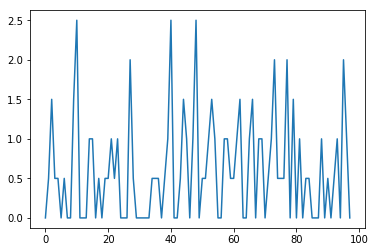

In [212]:
plt.plot(compdf.groupby(['Year','Month']).mean()['RespED'].values)